# A Real world application - Fraud detection

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# read data into a dataframe
df = pd.read_csv(r'address/fraud_data.csv')
# count true values to see the class distribution 
(df[df['Class']==1])['Class'].count()

356

In [6]:
# Split data into X_train, X_test, y_train, y_test sets
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67


In [7]:
# let's start with a dummy classifier. this classifier will classify based on the most frequent occurnece 
# of a variablle 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, recall_score, precision_score
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
predicted = dummy_majority.predict(X_test)
accuracy_sco = accuracy_score(y_test, predicted)
recall_sco = recall_score(y_test, predicted)
print(accuracy_sco, recall_sco)


0.9852507374631269 0.0


In [11]:
# next use support vector calssifier and check its performance
from sklearn.svm import SVC
clf = SVC().fit(X_train, y_train)
predicted = clf.predict(X_test)
accuracy_sco = accuracy_score(y_test,predicted)
recall_sco = recall_score(y_test, predicted)
precision_sco = precision_score(y_test, predicted)
print(accuracy_sco,recall_sco,precision_sco)
#we can see that accuracy is better than a dummy classifier 

0.9900442477876106 0.35 0.9333333333333333


In [13]:
#find the consfusion matrix for SVC classifier
# for this code let's select a thresold of -220
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
clf = SVC(C=1e9, gamma=1e-7).fit(X_train, y_train)
predicted = clf.predict(X_test)
score_clf = clf.decision_function(X_test)
predicted_thres = binarize(score_clf.reshape(-1,1), -220)
matrix1 = confusion_matrix(y_test, predicted)
matrix2 = confusion_matrix(y_test, predicted_thres)
print(matrix1, matrix2)

[[5340    4]
 [  16   64]] [[5320   24]
 [  14   66]]


C:\Users\sharm.LAPTOP-118C54MT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=-220 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [14]:
# let's see how does logistic regression performs on the data
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression 
clf_log = LogisticRegression().fit(X_train, y_train)
predicted_log = clf_log.predict(X_test)
predicted_log_prob = clf_log.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, predicted_log_prob[:,1])
precision_roc, recall_roc, threshold_roc = roc_curve(y_test, predicted_log_prob[:,1])
recall_1 = recall[np.where(precision==0.75)][0] #recall when the precision is 0.75.
print(recall_1)

0.825


C:\Users\sharm.LAPTOP-118C54MT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>


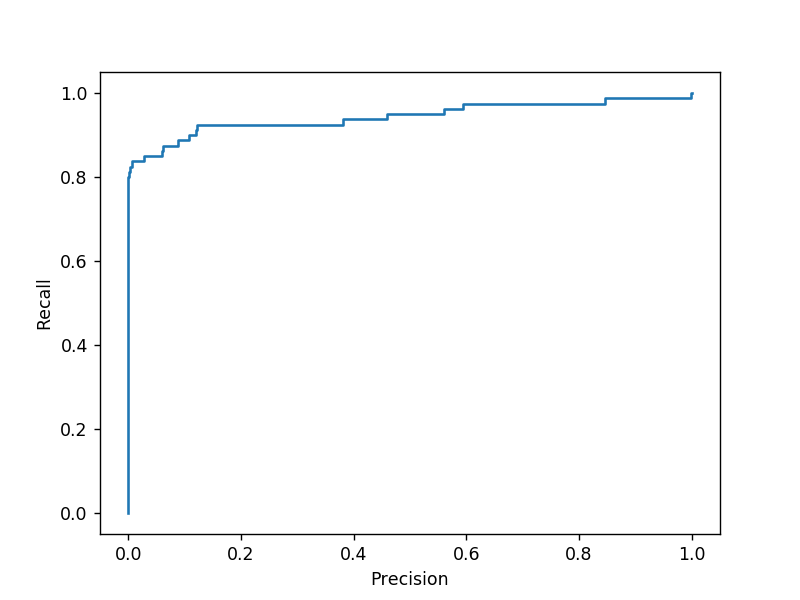

Text(0, 0.5, 'Recall')

In [15]:
# plot the precision-recall curve 
plt.figure()
plt.plot(precision_roc, recall_roc)
plt.xlabel('Precision')
plt.ylabel('Recall')

In [26]:
# As we saw the grid search classifier did not perform that well. Perform gridsearch on parameters for 
# logistic classifier to improve the performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf_log6 = LogisticRegression(penalty='l1', solver='liblinear')
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
grid_clf = GridSearchCV(clf_log6, param_grid=grid_values, scoring='recall')
grid_clf.fit(X_train, y_train)
grid_clf.best_score_
# change the parameters to improve the performance 

0.8115584415584415

<IPython.core.display.Javascript object>


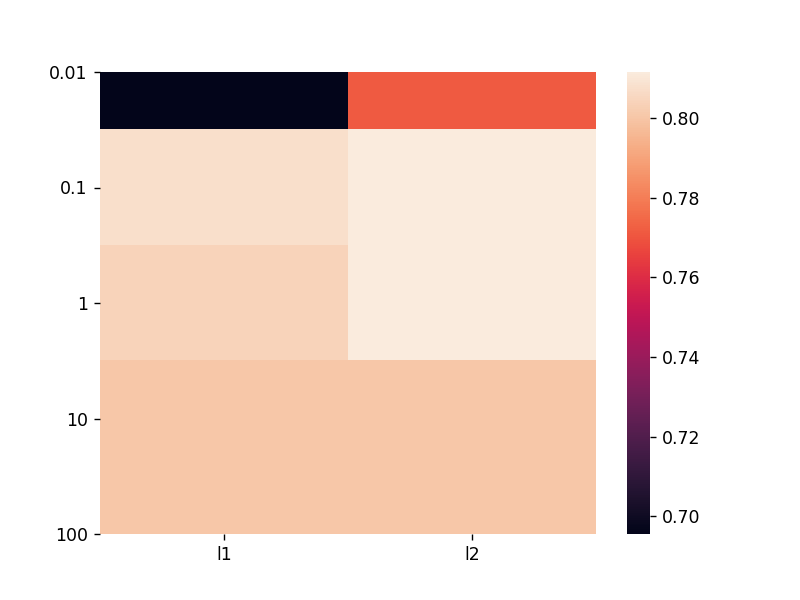

In [27]:
# visualize results from the grid search
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(grid_clf.cv_results_['mean_test_score'].reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);

